**handson用資料としての注意点**

普通、同じセル上で何度も試行錯誤するので、最終的に上手くいったセルしか残らず、失敗したセルは残りませんし、わざわざ残しません。

今回はhandson用に 試行・思考過程を残したいと思い、エラーやミスが出ても下のセルに進んで処理を実行するようにしています。

notebookのセル単位の実行ができるからこそのやり方かもしれません。良い。

（下のセルから文は常体で書きます。）

kunai (@jdgthjdg)

---


preprocess(前処理) というタイトル、今までのは pre-preprocess

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import numpy as np
import qgrid
#設定でDataFrameなどが長く表示されないようにします（画面領域の消費を抑えてhandsonをしやすくするため）
# 長い場合の途中の省略表示(...)を出す閾値の設定（折り返しとは無関係）
pd.set_option('max_rows',10)
pd.set_option('max_columns',20) # これを超えたら全部は表示しない。 A B C ... X Y Z のように途中を省く。

ここまでの処理で生成したDataFrameをpickleで保存したのでそれを読む  
pickle にしておくと読み込みも一瞬。  
最初からcsvなどを読んで成形して・・・を行うコードを書かなくても良いので、一時的なセーブデータとしては重宝する！（日付のパースなどをやり直さなくて良いので高速）

In [2]:
kafun = pd.read_pickle("kafun03.pkl")
kafun.head()

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,滋賀県高島県事務所,滋賀県森林センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,大阪府環境情報センター,豊中市役所第一庁舎,大阪府南河内農と緑の総合事務所 滝畑ダム分室,...,北山緑化植物園,西播磨県民局西播磨総合庁舎,奈良県産業振興総合センター,橿原総合庁舎,和歌山県東牟婁振興局,滋賀県林業普及センター,大阪合同庁舎第2号館別館,彦根地方気象台,舞鶴市西ｺﾐｭﾆﾃｨｾﾝﾀｰ,兵庫県環境研究センター
date_hour,,,,,,,,,,,,,,,,,,,,,
2008-02-01 00:00:00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01 01:00:00,0.0,0.0,0.0,0.0,0.0,-9998.0,0.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01 02:00:00,0.0,0.0,-9998.0,0.0,0.0,-9998.0,0.0,0.0,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01 03:00:00,0.0,0.0,4.0,0.0,0.0,-9998.0,-9998.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-01 04:00:00,0.0,8.0,20.0,4.0,0.0,0.0,-9998.0,8.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
kafun.tail()

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,滋賀県高島県事務所,滋賀県森林センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,大阪府環境情報センター,豊中市役所第一庁舎,大阪府南河内農と緑の総合事務所 滝畑ダム分室,...,北山緑化植物園,西播磨県民局西播磨総合庁舎,奈良県産業振興総合センター,橿原総合庁舎,和歌山県東牟婁振興局,滋賀県林業普及センター,大阪合同庁舎第2号館別館,彦根地方気象台,舞鶴市西ｺﾐｭﾆﾃｨｾﾝﾀｰ,兵庫県環境研究センター
date_hour,,,,,,,,,,,,,,,,,,,,,
2018-06-30 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-30 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-30 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-30 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**もしかして、NaNしかない行が多い？**

## 全部が NaN の行を消去する。  

[dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) を使う

デフォルトでは axisで設定した方向の中に、一つでもNaNがあると消去されてしまう。how="any"  
ドキュメントを見る。

In [4]:
kafun = kafun.dropna(axis=0, how="all")
kafun.tail()

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,滋賀県高島県事務所,滋賀県森林センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,大阪府環境情報センター,豊中市役所第一庁舎,大阪府南河内農と緑の総合事務所 滝畑ダム分室,...,北山緑化植物園,西播磨県民局西播磨総合庁舎,奈良県産業振興総合センター,橿原総合庁舎,和歌山県東牟婁振興局,滋賀県林業普及センター,大阪合同庁舎第2号館別館,彦根地方気象台,舞鶴市西ｺﾐｭﾆﾃｨｾﾝﾀｰ,兵庫県環境研究センター
date_hour,,,,,,,,,,,,,,,,,,,,,
2018-05-31 19:00:00,NaN,12.0,NaN,NaN,8.0,NaN,16.0,NaN,8.0,NaN,...,4.0,NaN,8.0,0.0,0.0,NaN,4.0,8.0,0.0,0.0
2018-05-31 20:00:00,NaN,32.0,NaN,NaN,16.0,NaN,8.0,NaN,8.0,NaN,...,8.0,NaN,12.0,4.0,0.0,NaN,0.0,0.0,12.0,0.0
2018-05-31 21:00:00,NaN,4.0,NaN,NaN,0.0,NaN,4.0,NaN,24.0,NaN,...,12.0,NaN,16.0,8.0,0.0,NaN,4.0,4.0,0.0,0.0
2018-05-31 22:00:00,NaN,4.0,NaN,NaN,8.0,NaN,8.0,NaN,12.0,NaN,...,4.0,NaN,16.0,4.0,4.0,NaN,12.0,0.0,16.0,0.0
2018-05-31 23:00:00,NaN,0.0,NaN,NaN,8.0,NaN,0.0,NaN,16.0,NaN,...,8.0,NaN,24.0,16.0,0.0,NaN,16.0,12.0,0.0,4.0


---


## データがNaNばかりの列を排除したい。
#### 各列の非NaNのデータ数を数えてplotする

In [5]:
kafun.shape

(31973, 34)

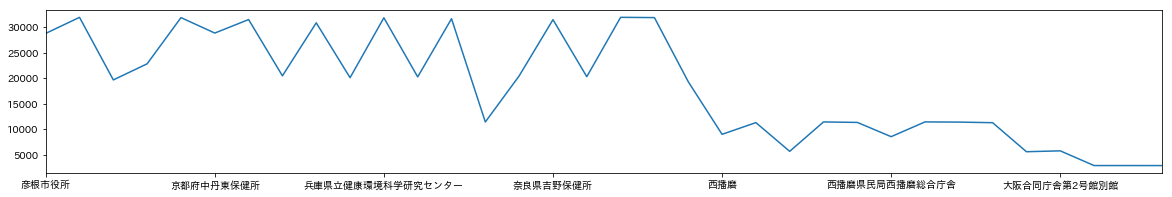

In [6]:
kafun.count().plot(figsize=(20,3));

### 非NaNのデータ数が 25000以下の列にさようならをする

どうやって絞るか？

In [7]:
kafun.count() > 25000

彦根市役所                 True
滋賀県琵琶湖・環境科学研究センター     True
滋賀県高島県事務所            False
滋賀県森林センター            False
京都府立医科大学              True
                     ...  
滋賀県林業普及センター          False
大阪合同庁舎第2号館別館         False
彦根地方気象台              False
舞鶴市西ｺﾐｭﾆﾃｨｾﾝﾀｰ       False
兵庫県環境研究センター          False
Length: 34, dtype: bool

<br>

###  これで取れるデータは・・・・
<br>

**columns ( 列 ) の bool 配列**
<br>

Columns/Rowsの bool によるの選択には loc が使える！

In [8]:
col_above_25k = kafun.count()>25000
col_above_25k

彦根市役所                 True
滋賀県琵琶湖・環境科学研究センター     True
滋賀県高島県事務所            False
滋賀県森林センター            False
京都府立医科大学              True
                     ...  
滋賀県林業普及センター          False
大阪合同庁舎第2号館別館         False
彦根地方気象台              False
舞鶴市西ｺﾐｭﾆﾃｨｾﾝﾀｰ       False
兵庫県環境研究センター          False
Length: 34, dtype: bool

In [9]:
kafun.loc[: , col_above_25k]

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2008-02-01 00:00:00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2008-02-01 01:00:00,0.0,0.0,0.0,-9998.0,0.0,0.0,4.0,0.0,0.0,8.0,NaN
2008-02-01 02:00:00,0.0,0.0,0.0,-9998.0,0.0,8.0,0.0,0.0,0.0,0.0,NaN
2008-02-01 03:00:00,0.0,0.0,0.0,-9998.0,-9998.0,0.0,4.0,0.0,0.0,8.0,NaN
2008-02-01 04:00:00,0.0,8.0,0.0,0.0,-9998.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-05-31 19:00:00,NaN,12.0,8.0,NaN,16.0,8.0,16.0,12.0,0.0,0.0,0.0
2018-05-31 20:00:00,NaN,32.0,16.0,NaN,8.0,8.0,0.0,4.0,20.0,12.0,4.0
2018-05-31 21:00:00,NaN,4.0,0.0,NaN,4.0,24.0,4.0,4.0,8.0,0.0,8.0


---

### copy() して、新たなdfを作成する。
#### copyをしないとコピー元データへの参照が残り・・・
#### SettingWithCopyWarning となったら、対症療法的に .copy() を試してみる（乱暴）

なぜcopyするのか。。。 SettingWithCopyWarning などで怒られる

In [10]:
kafun = kafun.loc[:, col_above_25k].copy()
kafun.head() # すっきり

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2008-02-01 00:00:00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2008-02-01 01:00:00,0.0,0.0,0.0,-9998.0,0.0,0.0,4.0,0.0,0.0,8.0,NaN
2008-02-01 02:00:00,0.0,0.0,0.0,-9998.0,0.0,8.0,0.0,0.0,0.0,0.0,NaN
2008-02-01 03:00:00,0.0,0.0,0.0,-9998.0,-9998.0,0.0,4.0,0.0,0.0,8.0,NaN
2008-02-01 04:00:00,0.0,8.0,0.0,0.0,-9998.0,0.0,0.0,0.0,0.0,0.0,NaN


---

## NaNも0に変更する fillna()

#### 異常値の扱い方は色々あるだろうが、今回はとりあえず、NaNも異常値(負値)も0にする  


### [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [11]:
kafun = kafun.fillna(0)
kafun.head()

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2008-02-01 00:00:00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-02-01 01:00:00,0.0,0.0,0.0,-9998.0,0.0,0.0,4.0,0.0,0.0,8.0,0.0
2008-02-01 02:00:00,0.0,0.0,0.0,-9998.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
2008-02-01 03:00:00,0.0,0.0,0.0,-9998.0,-9998.0,0.0,4.0,0.0,0.0,8.0,0.0
2008-02-01 04:00:00,0.0,8.0,0.0,0.0,-9998.0,0.0,0.0,0.0,0.0,0.0,0.0


---


## 負の値を0に変更する

<br>

**忘れた頃に登場**

- -9998:降雪による欠測
- -9997:黄砂による欠測
- -9996:その他の欠測(前後の時間や周辺観測値と比較して不自然なデータ)
- 空白:未観測または通信障害による欠測

<br>
<br>

負の値を0に実現する方法は色々あるが、  
思いつきやすいのだと、 min/max系

もっと楽なやり方はないか・・・  

<br>
<br>

<br>

ドキュメントを探していると・・・  

### [clip()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.clip.html)

<br>



In [12]:
kafun = kafun.clip(lower=0.0) # とてもらく
kafun.head()

,彦根市役所,滋賀県琵琶湖・環境科学研究センター,京都府立医科大学,京都府中丹東保健所,京都市右京区役所京北合同庁舎,豊中市役所第一庁舎,兵庫県立健康環境科学研究センター,兵庫県篠山庁舎,奈良県吉野保健所,和歌山地方気象台,和歌山県西牟婁振興局庁舎
date_hour,,,,,,,,,,,
2008-02-01 00:00:00,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-02-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,8.0,0.0
2008-02-01 02:00:00,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
2008-02-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,8.0,0.0
2008-02-01 04:00:00,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### pickle にて保存

In [13]:
kafun.to_pickle("kafun04.pkl")

## グラフをみる

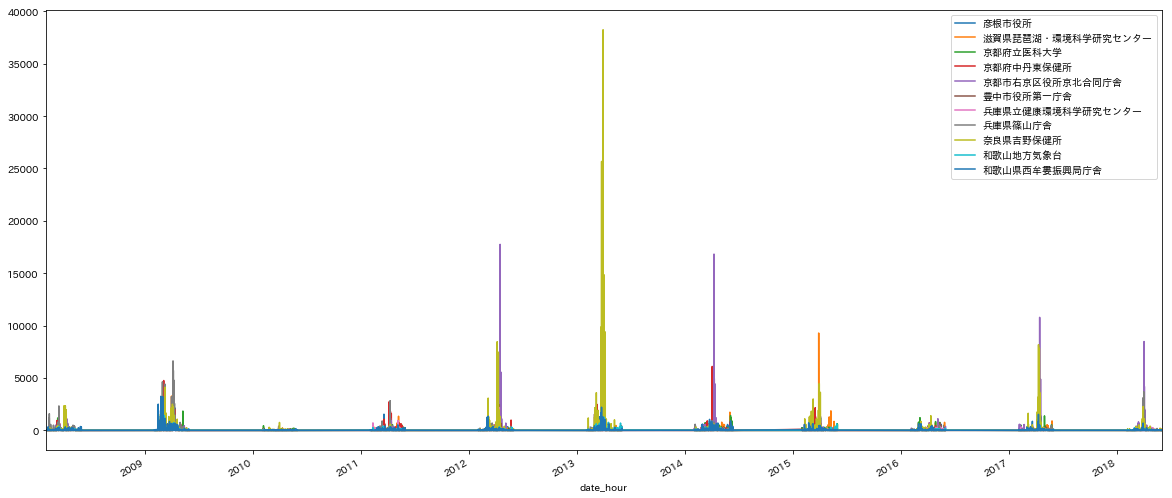

In [14]:
kafun.plot(figsize=(20,9), legend=True);

2013年の奈良強すぎでは？

<br>


#### [plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) のオプションも調べる


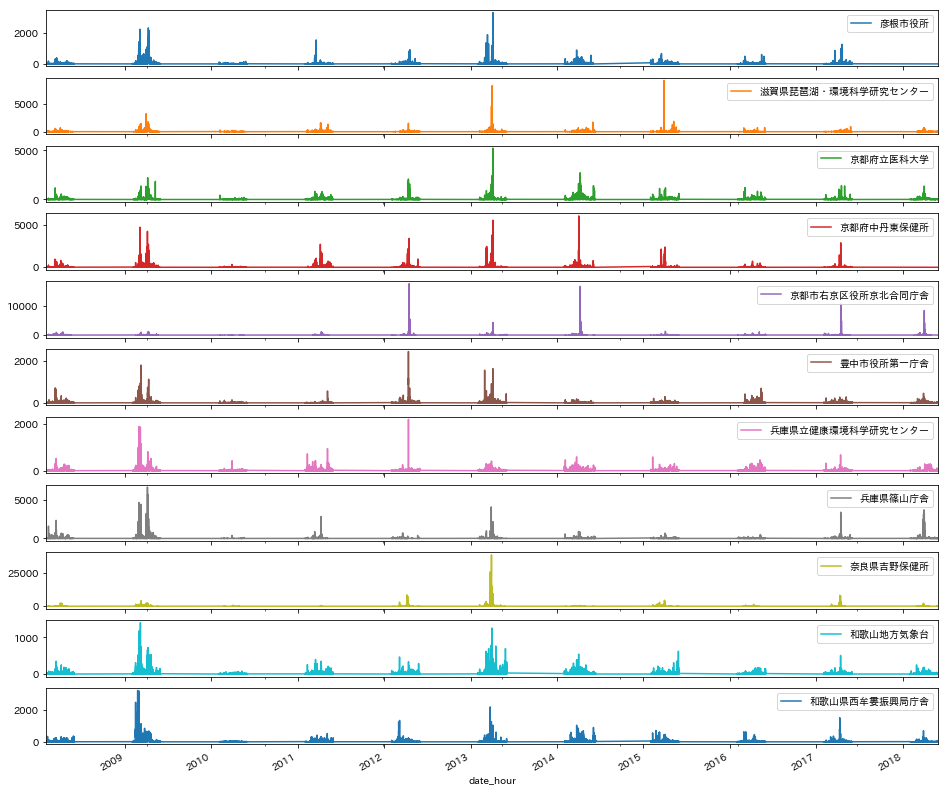

In [15]:
kafun.plot(figsize=(16,15), subplots=True);